In [1]:
#imports

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
num_pokemon = len(os.listdir("data/pokemon_jpg/pokemon_jpg/"))
num_pokemon

819

In [3]:
ims = []

for im_name in os.listdir("data/pokemon_jpg/pokemon_jpg/"):
    s = (f"data/pokemon_jpg/pokemon_jpg/{str(im_name)}")
    curr = torchvision.io.read_image(s)
    ims.append(curr)
    
ims = torch.stack(ims)

In [4]:
#make ims just one channel for now
ims = ims[:,1,:,:]

In [5]:
ims = ims/255

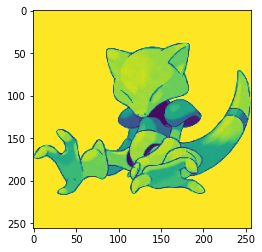

In [6]:
ims[0]
plt.imshow(transforms.ToPILImage()(ims[0]))

In [7]:
import torch.nn as nn

#nn architecture

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.model = nn.Sequential(
        nn.Linear(256*256,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,256),
        nn.ReLU(),
        nn.Linear(256,256*256)
        )
        
    def forward(self, x):
        x = torch.flatten(x)
        return self.model(x)

In [8]:
def loss_fn(input_image,output_image):
    input_image = torch.flatten(input_image)
    return torch.sum(input_image-output_image)**2

In [9]:
model = NN()
loss =  loss_fn # Step 2: loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.000000001) # Step 3: training method

In [10]:
train_loss_history = []
for epoch in range(10000):
    train_loss = 0.0
    optimizer.zero_grad()
    predicted_output = model(ims[0])
    fit = loss(ims[0],predicted_output)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
    train_loss_history.append(train_loss)
    # print(f'Epoch {epoch}, Train loss {train_loss}')
print(train_loss_history[-1])


1.4901161193847656e-08


In [15]:
out = model(ims[0])
out = torch.reshape(out,(256,256))
out.shape

torch.Size([256, 256])

In [16]:
out

tensor([[ 2.9486,  0.4799, -0.4801,  ...,  1.4723,  1.8412,  0.0070],
        [ 1.9832,  2.7657,  0.6371,  ..., -0.0858,  0.2438,  2.8693],
        [ 1.5991, -1.6250,  0.3891,  ..., -1.5887,  1.4635, -1.5825],
        ...,
        [ 0.4524,  2.9811, -1.9675,  ...,  1.3497,  0.9310, -1.5864],
        [ 0.6228,  1.3087,  3.0313,  ...,  2.4735,  2.0806, -1.2850],
        [-0.7702,  0.5015,  0.9738,  ...,  0.9975,  1.8158, -0.4621]],
       grad_fn=<ReshapeAliasBackward0>)

In [17]:
ims[0]

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

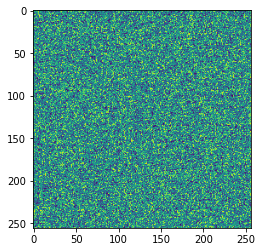

In [18]:
plt.imshow(transforms.ToPILImage()(out))